# Classification

*지도학습* 기법에는 일련의 변수와 알고 있는 라벨 값이 포함된 데이터 세트를 학습하여 *라벨*을 예측합니다.***y***는 예측하려는 레이블을 나타내고 ***X*** 는 모델을 예측하기 위해 사용하는 변수의 벡터를 나타냅니다.

$$ y = f([x_1, x_2, x_3, ...]) $$


*분류*는 예측 변수(***X***)를 학습하여 레이블(***y***)을 예측하는 지도 머신 러닝의 한 형태입니다. 가능한 각 클래스에 속하는 관찰 된 케이스의 확률과 적절한 레이블을 예측합니다. 가장 간단한 분류 형식은 이진분류이며, 여기서 레이블은 두 클래스 중 하나를 나타내는 0 또는 1입니다.(예 : "True" 또는 "False"; "내부" 또는 "외부"; "수익성" 또는 "수익성 없음" 등).

## 이진 분류

모델이 두 클래스 중 하나에 속하는 레이블을 예측해야 하는 이진 분류의 예를 살펴 보겠습니다. 이 연습에서는 일부 의료 데이터를 기반으로 환자가 당뇨병 검사를 받아야하는지 여부를 예측하기 위해 이진 분류기를 훈련합니다.

### 데이터 탐색

다음 셀을 실행하여 특허 데이터의 CSV 파일을*Pandas*데이터 프레임에 로드 합니다.

>*인용*: 이 연습에 사용 된 당뇨병 데이터 세트는 원래 the National Institute of Diabetes and Digestive and Kidney Diseases에서 수집한 데이터를 기반으로 합니다.

In [1]:
import pandas as pd

# load the training dataset
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


이 데이터는 당뇨병 검사를 받은 일부 환자에 대한 진단 정보로 구성된다. 필요한 경우 오른쪽으로 스크롤하고 데이터 세트의 마지막 열(**Diabetic**)에 당뇨병 음성 테스트 환자의 경우 값 *0*, 양성 테스트 환자의 경우 값이 *1*이 포함되어 있습니다. 이것은 예측하기 위해 모델을 훈련시킬 레이블입니다. 대부분의 다른 열 (**Pregnancies**,**PlasmaGlucose**,**DiastolicBloodPressure** 등)은 *당뇨병* 라벨을 예측하는데 사용할 특징입니다.

전체 변수에서 레이블에서 분리 해보겠습니다. 예측 변수를 **X**, 레이블 **y**라고 합니다.

In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


이제 각 레이블 값에 대한 변수들의 분포를 비교해 보겠습니다.

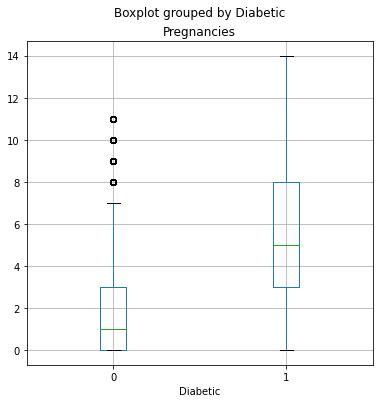

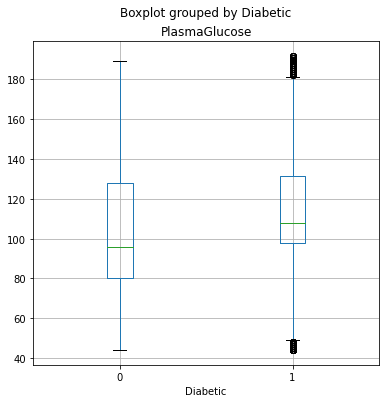

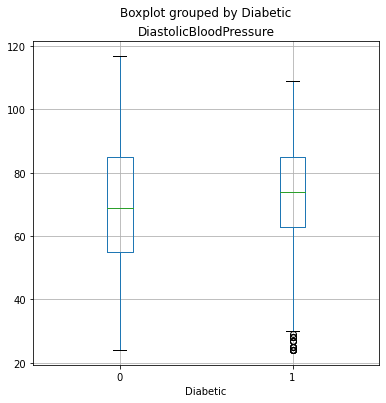

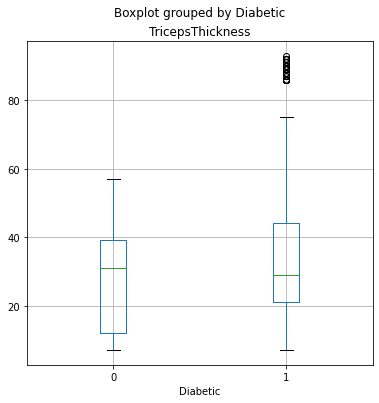

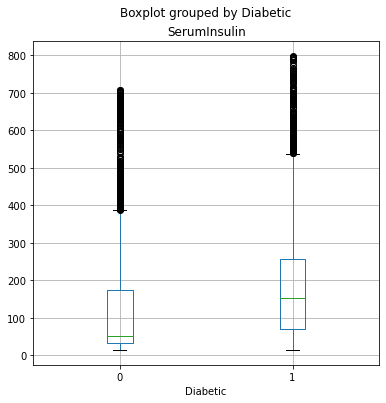

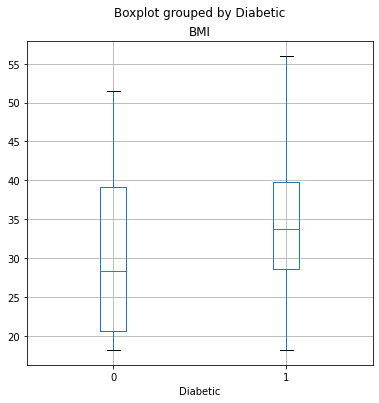

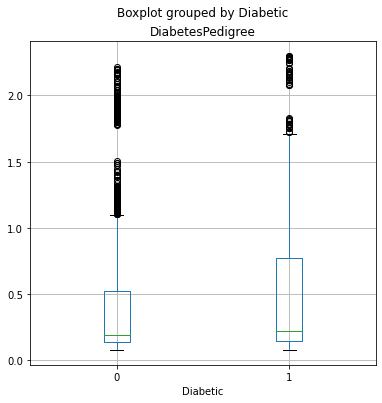

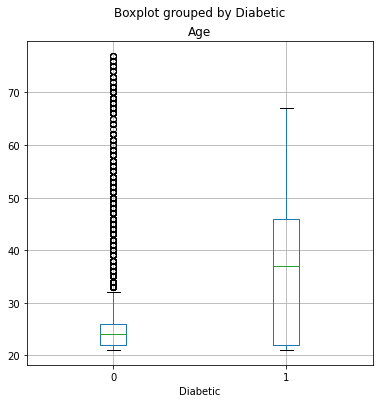

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

일부 특징의 경우 각 라벨 값의 분포에 눈에 띄는 차이가 있습니다. 특히 **Pregnancies**과 **Age**은 당뇨병 환자의 분포가 비당뇨병 환자와 현저하게 다릅니다. 이러한 변수는 환자가 당뇨병인지 여부를 예측하는데 도움이 될 수 있습니다.

### 데이터 분할

우리의 데이터 세트에는 레이블에 대해 알려진 값이 포함되어 있으므로 이를 사용하여 분류기를 훈련시켜 기능과 레이블 값 간의 통계적 관계를 찾을 수 있습니다. 하지만 우리 모델이 좋은지 어떻게 알 수 있을까요? 또한 훈련되지 않은 새로운 데이터와 함께 사용할 때 올바르게 예측할 수 있는지 어떻게 알 수 있을까요? 우리는 알려진 레이블 값이 있는 대규모 데이터 세트가 있다는 사실을 활용하고, 일부만 사용하여 모델을 훈련시키고, 훈련된 모델을 테스트하기 위해 일부 데이터를 사용하지 않고 예측된 레이블을 실제 레이블과 비교할 수 있습니다.

Python에서 **scikit-learn** 패키지에는 학습 및 테스트 데이터를 통계적으로 무작위로 분할 할 수 있도록 보장하는 **train_test_split** 함수를 포함하여 머신 러닝 모델을 구축하는데 사용할 수 있는 많은 함수가 포함되어 있습니다. 이를 사용하여 학습을 위해 데이터를 70%로 분할하고 테스트를 위해 30%를 남깁니다.

In [4]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


### 이진 분류 모델 학습 및 평가
이제 학습할 변수(**X_train**)를 학습 레이블(**y_train**)에 맞춰 모델을 학습시킬 준비가 되었습니다. 모델 훈련에 사용할 수있는 다양한 알고리즘이 있습니다. 이 예에서는 분류를 위해 잘 알려진 알고리즘인 *로지스틱 회귀*를 사용합니다. 훈련 변수 및 레이블 외에도 aregularization 매개 변수를 설정 해야합니다. 이는 샘플의 모든 편향에 대응하고 모델을 학습 데이터에 과적합하지 않도록 하여 모델이 잘 일반화되도록하는데 사용됩니다.

> **참고** : 기계 학습 알고리즘의 파라미터는 일반적으로 ashyperparameters라고합니다 (데이터사이언티스트에게 파라미터는 데이터 자체의 값입니다. 하이퍼 파라미터는 데이터에서 외부적으로 정의됩니다!)

In [5]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


이제 훈련 데이터를 사용하여 모델을 훈련 시켰으므로 남겨 놓은 테스트 데이터를 사용하여 얼마나 잘 예측하는지 평가할 수 있습니다. **scikit-learn**은 이 작업을 수행하는 데 도움이 될 수 있습니다. 먼저 모델을 사용하여 테스트 세트의 레이블을 예측하고 예측된 레이블을 실제 레이블과 비교해 보겠습니다.

In [6]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


레이블 배열이 너무 길어서 노트북 출력에 표시 할 수 없으므로 몇 가지 값만 비교할 수 있습니다. 예측 및 실제 라벨을 모두 출력하더라도 모델을 평가하는 합리적인 방법으로 만들기에는 라벨이 너무 많습니다. 다행히 **scikit-learn**에는 몇 가지 트릭이 더 있으며 모델을 평가하는 데 사용할 수있는 몇 가지 메트릭을 제공합니다.

가장 분명한 것은 예측의 *정확도*를 확인하는 것입니다. 간단히 말해서 모델이 올바르게 예측 한 레이블의 비율은 얼마일까요?

In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7893333333333333


정확도는 10 진수 값으로 반환됩니다. 값이 1.0이면 모델이 예측의 100 %를 올바르게 얻었음을 의미합니다. 0.0의 정확도는 쓸모 없습니다!

정확성은 평가할 수있는 합리적인 지표처럼 보이지만 분류 정확성에서 명확한 결론이라고 도출하는데에는 다른 지표도 필요 합니다. 얼마나 많은 케이스가 올바르게 예측되었는지 측정한 것임을 기억하십시오. 인구의 3%만이 당뇨병이라고 가정합니다. 항상 0을 예측하는 분류기를 만들 수 있으며 97 % 정확하지만 당뇨병 환자를 식별하는데 크게 도움이되지는 않습니다!

다행히도 모델의 성능에 대해 좀 더 자세히 보여주는 다른 측정 항목이 있습니다. Scikit-Learn에는 원래 정확도 보다 더 많은 통찰력을 제공하는 분류 보고서(classification report)를 만드는 기능이 포함되어 있습니다.

In [8]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



분류 보고서에는 각 클래스 (0과 1)에 대한 다음 메트릭이 포함됩니다.

> 헤더 행이 값과 일치하지 않을 수 있습니다.

* *정밀도(Precision)* :이 클래스에 대한 모델의 예측 중 올바른 비율
* *재현율(Recall)* : 테스트 데이터 세트에 있는 이 클래스의 모든 인스턴스 중에서 모델이 식별한 비율
* *F1-Score* : 정밀도와 재현율을 모두 고려하는 평균 측정 항목
* *Support* : 테스트 데이터 세트에 각 클래스의 데이터 개수

분류 보고서에는 각 클래스의 케이스 수에서 불균형을 허용하는 가중 평균을 포함하여 이러한 메트릭에 대한 평균도 포함됩니다.

이것은 *이진* 분류 문제이기 때문에 ***1*** 클래스는 *양성*으로 간주되며 정밀도와 재현율이 특히 흥미롭습니다. 실제로 다음 질문에 답합니다.

- 모델이 예측 한 모든 환자 중 실제로 당뇨병이있는 환자는 몇 명입니까?
- 실제로 당뇨병 환자 중 몇 명을 모델이 식별 했습니까?

scikit-learn에서 **precision_score** 및 **recall_score** 측정 항목을 사용하여 자체적으로 이러한 값을 검색 할 수 있습니다.(기본적으로 이진 분류 모델을 가정)

In [9]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


정밀도 및 재현율 메트릭은 다음과 같은 네 가지 가능한 예측 결과에서 파생됩니다.
* *True Positives* : 예측 라벨과 실제 라벨이 모두 1입니다.
* *False Positives* : 예측 라벨은 1이지만 실제 라벨은 0입니다.
* *False Negatives* : 예측 라벨은 0이지만 실제 라벨은 1입니다.
* *True Negatives* : 예측 라벨과 실제 라벨이 모두 0입니다.

이러한 측정 항목은 일반적으로 테스트 세트에 대해 표로 작성되며 다음과 같은 형식을 취하는 혼동 행렬로 함께 표시됩니다.

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

올바른 (*true*) 예측은 왼쪽 상단에서 오른쪽 하단으로 대각선을 형성합니다. 모델이 좋은 경우이 수치는 *false* 예측보다 훨씬 높아야합니다.

Python에서는 **sklearn.metrics.confusion_matrix** 함수를 사용하여 학습된 분류(classifier)에 대해 다음 값을 찾을 수 있습니다.

In [10]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


지금까지 모델의 예측을 1 또는 0 클래스 레이블로 간주했습니다. 사실, 상황은 그것보다 조금 더 복잡합니다. 로지스틱 회귀와 같은 통계적 기계 학습 알고리즘은 *확률* 을 기반으로합니다. 따라서 이진 분류기에 의해 실제로 예측되는 것은 레이블이 참일 확률 (**P(y)**)과 
레이블이 거짓 일 확률 (1-**P(y)**)입니다. 임계 값 0.5는 예측 된 레이블이 1 (*P(y) > 0.5*)인지 0 (*P(y) <= 0.5*)인지 결정하는 데 사용됩니다. **predict_proba** 방법을 사용하여 각 케이스의 확률 쌍을 볼 수 있습니다.

In [11]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81647809 0.18352191]
 [0.96294954 0.03705046]
 [0.80856407 0.19143593]
 ...
 [0.60693775 0.39306225]
 [0.10684087 0.89315913]
 [0.6387308  0.3612692 ]]


예측 점수를 1 또는 0으로 결정하는 것은 예측 확률이 비교되는 임계 값에 따라 다릅니다. 임계 값을 변경하면 예측에 영향을 미칩니다. 따라서 혼동 행렬의 메트릭을 변경합니다. 분류자를 평가하는 일반적인 방법은 가능한 임계 값 범위에 대해 *true positive 비율* (재현율)과 *false positive 비율* 을 조사하는 것입니다. 이러한 비율은 가능한 모든 임계 값에 대해 플롯되어 다음과 같이 *ROC (received operator character)차트* 로 알려진 차트를 형성합니다.

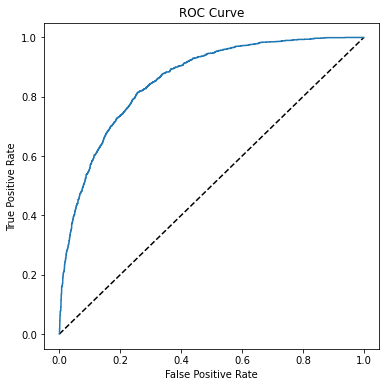

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC 차트는 0과 1 사이의 다른 임계 값에 대한 참 및 거짓 긍정 비율의 곡선을 보여줍니다. 완벽한 분류자는 왼쪽을 곧장 올라가서 위쪽을 가로지르는 곡선을 가지고 있을 것이다. 차트의 대각선은 50/50 무작위 예측으로 올바르게 예측할 확률을 나타냅니다. 따라서 곡선이 그보다 더 높기를 원합니다(또는 모델이 단순히 추측하는 것보다 낫지 않습니다!).

곡선 아래 영역 (AUC)은 모델의 전체 성능을 정량화하는 0에서 1 사이의 값입니다. 이 값이 1에 가까울수록 모델이 더 좋습니다. 다시 한 번 scikit-Learn에는이 메트릭을 계산하는 함수가 포함되어 있습니다.

In [13]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568480296867549


### 파이프라인에서 전처리 수행

이 경우 ROC 곡선과 AUC는 랜덤 추측보다 모형이 더 잘 수행된다는 것을 나타내며, 이는 데이터에 대한 전처리를 거의 수행하지 않았다는 점을 고려할 때 나쁘지 않습니다.

실제로는 알고리즘이 모델에 더 쉽게 맞출 수 있도록 데이터에 대한 몇 가지 전처리를 수행하는 것이 일반적입니다. 데이터를 모델링할 수 있도록 하기 위해 수행할 수 있는 광범위한 전처리 방법들은 다음과 같은 몇 가지 일반적인 기법으로 제한됩니다.

- 동일한 스케일에 있도록 수치형 변수를 스케일링합니다. 따라서 값이 큰 형상이 예측에 불균형적으로 영향을 미치는 계수를 생성하지 않습니다.
- 범주형 변수를 인코딩합니다. 예를 들어 *one-hot encoding* 을 사용하여 가능한 각 범주 값에 대해 개별 이진(참/거짓) 특징을 생성할 수 있습니다.

이러한 전처리 전환을 적용하기 위해 *파이프라인*이라는 Scikit-Learn 기능을 사용할 것입니다. 이를 통해 알고리즘으로 끝나는 일련의 전처리 단계를 정의할 수 있습니다. 그런 다음 전체 파이프라인을 데이터에 적합시켜 모델이 모든 전처리 단계와 회귀 알고리즘을 캡슐화할 수 있습니다. 모델을 사용하여 새 데이터의 값을 예측하려면 동일한 변환을 적용해야 하기 때문에 이 방법이 유용합니다(교육 데이터에 사용되는 동일한 통계 분포 및 범주 인코딩을 기반으로 함).

>**참고**: *파이프라인*이라는 용어는 기계 학습에서 광범위하게 사용되며, 매우 다른 의미를 갖는 경우가 많습니다! 이러한 맥락에서 Seagate는 Scikit-Learn에서 파이프라인 개체를 참조하는 데 사용되지만 다른 곳에서 다른 의미를 갖는 경우도 있습니다.

In [14]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


파이프라인은 전처리 단계와 모델 교육을 캡슐화합니다.

이 파이프라인에서 학습한 모델을 사용하여 테스트 세트의 레이블을 예측하고 성능 메트릭을 이전에 생성한 기본 모델과 비교해 보겠습니다.

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202444963329531


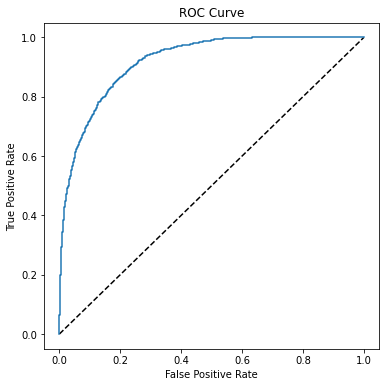

In [15]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



결과가 조금 더 좋아 보이므로 데이터를 전처리하는 것이 분명히 차이를 만들어 냈습니다.

### 다른 알고리즘을 사용해 보십시오.

이제 다른 알고리즘을 시도해 보겠습니다. 이전에는 *선형* 알고리즘인 로지스틱 회귀 알고리즘을 사용했습니다. 시도할 수 있는 분류 알고리즘은 다음과 같습니다.

- **Support Vector Machine algorithms**: 클래스를 구분하는 *hyperplane*을 정의하는 알고리즘
- **Tree-based algorithms**: 예측에 도달하기 위한 의사결정 트리를 구축하는 알고리즘
- **Ensemble algorithms** : 복수의 기본 알고리즘의 산출물을 조합하여 일반화 해가며 개선하는 알고리즘

이번에는 이전과 동일한 전처리 단계를 사용하겠지만, 복수의 랜덤 의사결정 트리의 결과들을 결합하는 *Random Forest* 알고리즘을 사용하여 모델을 학습하겠습니다(자세한 내용은 [Sikit-Learn 설명서](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) 참조).

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


새로운 모델의 성능 지표를 살펴보겠습니다.

Confusion Matrix:
 [[2866  120]
 [ 180 1334]] 

Accuracy: 0.9333333333333333
Overall Precision: 0.9174690508940853
Overall Recall: 0.8811096433289299

AUC: 0.9825226884421444


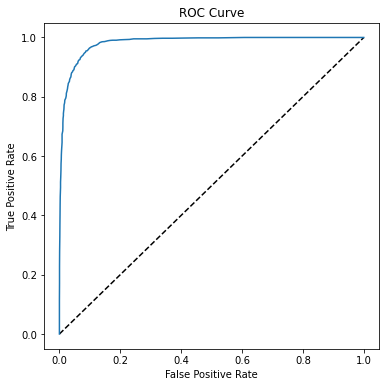

In [17]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

더 좋아 보이네요!

## 추론을 위한 모델 사용
이제 상당히 유용한 학습 모델을 확보했으므로 나중에 새 데이터에 대한 라벨을 예측하는데 사용할 수 있습니다.

In [18]:
import joblib

# Save the model as a pickle file
filename = './models/diabetes_model.pkl'
joblib.dump(model, filename)

['./models/diabetes_model.pkl']

라벨을 모르는 새로운 데이터가 있는 경우 모델을 로드하여 라벨에 대한 값을 예측할 수 있습니다.

In [19]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


## 다중 클래스 분류

이진 분류 기법은 데이터 관찰이 "참" 또는 "거짓"과 같은 두 가지 클래스 또는 범주 중 하나에 속할 때 잘 작동합니다. 데이터를 세 개 이상의 클래스로 분류할 수 있는 경우 다중 클래스 분류 알고리즘을 사용해야 합니다.

다중 클래스 분류는 여러 개의 이진 분류자의 조합으로 생각할 수 있습니다. 문제에 접근하는 방법에는 두 가지가 있습니다.

- **One vs Rest (OVR)*** 각 클래스 값에 대해 분류기가 생성되며, 예측이 특정 클래스인 경우 긍정적인 결과를, 예측이 다른 클래스인 경우 부정적인 예측이 생성됩니다. 네 가지 형상 클래스(*제곱*, *원*, *삼각형*, *육각형*)를 사용할 수 있는 분류 문제를 해결하려면 다음을 예측하는 네 개의 classifier(분류자)가 필요합니다.
    - *square* or not
    - *circle* or not
    - *triangle* or not
    - *hexagon* or not
    
- **One vs One(OVO)*** 각 클래스 쌍에 대한 분류기가 생성됩니다. 네 가지 모양 클래스에서 발생하는 분류 문제에는 다음과 같은 이진 분류자가 필요합니다.
    - *square* or *circle*
    - *square* or *triangle*
    - *square* or *hexagon*
    - *circle* or *triangle*
    - *circle* or *hexagon*
    - *triangle* or *hexagon*
    
두 접근 방식 모두에서 분류자를 결합하는 전체 모델은 개별 이진 분류기에서 생성된 확률을 사용하여 예측할 클래스를 결정하는 예측 벡터를 생성합니다.

다행히 scikit-learn을 포함한 대부분의 기계 학습 프레임 워크에서 다중 클래스 분류 모델을 구현하는 것은 이진 분류보다 훨씬 복잡하지 않습니다. 대부분의 경우 이진 분류에 사용되는 추정기는 OVR 알고리즘 인 OVO를 추상화하여 다중 클래스 분류를 암시적으로 지원합니다. 알고리즘을 사용하거나 둘 중 하나를 선택할 수 있습니다.

> **추가 정보**: Scikit-Learn에서 다중 클래스 분류에 대한 estimator 지원에 대한 자세한 내용은 [Scikit-Learn 설명서](https://scikit-learn.org/stable/modules/multiclass.html)를 참조하십시오.

여러 클래스의 관찰을 포함하는 데이터 세트를 조사하여 시작하겠습니다. 우리는 서로 다른 세 종의 펭귄에 대한 관찰 데이터 세트를 사용할 것입니다.

> **인용**: 이 연습에 사용된 펭귄 데이터 세트
[Dr. Kristen
Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a
member of the [Long Term Ecological Research
Network](https://lternet.edu/).

In [20]:
import pandas as pd

# load the training dataset
penguins = pd.read_csv('data/penguins.csv')

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
290,45.9,17.1,190.0,3575.0,2
47,37.5,18.9,179.0,2975.0,0
297,48.5,17.5,191.0,3400.0,2
4,36.7,19.3,193.0,3450.0,0
149,37.8,18.1,193.0,3750.0,0
81,42.9,17.6,196.0,4700.0,0
271,NaN,NaN,NaN,NaN,1
202,46.6,14.2,210.0,4850.0,1
104,37.9,18.6,193.0,2925.0,0
57,40.6,18.8,193.0,3800.0,0


데이터 세트에는 다음 열로 구성 되어있습니다/
* **CulmenLength**: 펭귄의 부리 길이.
* **Culmen Depth**: 펭귄의 부리 깊이(mm).
* **FlipperLength**: 펭귄 지느러미의 길이(mm).
* **BodyMass**: 펭귄의 체질량(g 단위).
* **Species**: 펭귄의 종을 나타내는 정수 값.

* *Species* 열은 예측하기 위해 모델을 교육하려는 레이블입니다. 데이터 세트에는 가능한 세 가지 종(0, 1, 2)이 포함됩니다. 실제 종 이름은 아래 코드로 확인할 수 있습니다.

In [21]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 44.5 14.7 214.0 4850.0 1 ] Gentoo
[ 40.8 18.4 195.0 3900.0 0 ] Adelie
[ 49.2 18.2 195.0 4400.0 2 ] Chinstrap
[ 41.1 17.6 182.0 3200.0 0 ] Adelie
[ 45.2 13.8 215.0 4750.0 1 ] Gentoo
[ 37.0 16.9 185.0 3000.0 0 ] Adelie
[ 36.3 19.5 190.0 3800.0 0 ] Adelie
[ 38.5 17.9 190.0 3325.0 0 ] Adelie
[ 41.5 18.5 201.0 4000.0 0 ] Adelie
[ 51.5 18.7 187.0 3250.0 2 ] Chinstrap


이제 데이터의 특징과 레이블이 무엇을 나타내는 지 알았으니 데이터 세트를 살펴 보겠습니다. 먼저 누락된 (*null*) 값이 있는지 살펴 보겠습니다.

In [22]:
# Count the number of null values for each column
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

누락된 변수 값은 일부 있지만 레이블은 누락 되지 않았습니다. Null이 포함된 행을 살펴보겠습니다.

In [23]:
# Show rows containing nulls
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


변수 값을 전혀 포함하지 않는 행이 두 개 있으므로 (*NaN*은 "숫자가 아님"을 나타냄) 모델 학습에 유용하지 않습니다. 데이터 세트에서 삭제하겠습니다.

In [24]:
# Drop rows containing NaN values
penguins=penguins.dropna()
#Confirm there are now no nulls
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

이제 누락 된 값을 처리 했으므로 상자 그림을 만들어 변수들이 레이블과 어떻게 관련되는지 살펴 보겠습니다.

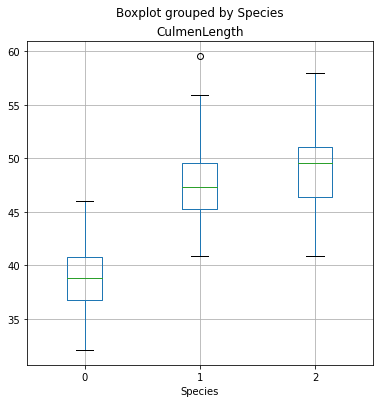

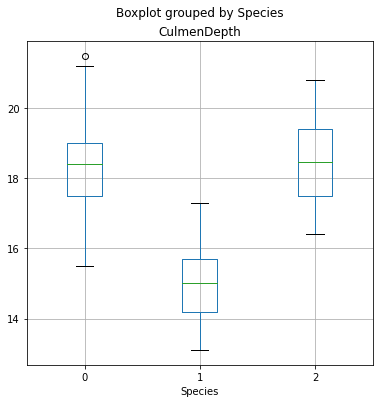

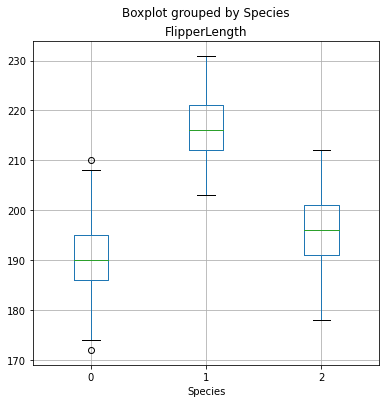

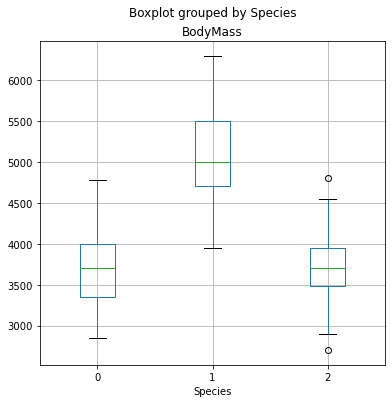

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

상자 그림에서 종 0과 2 (Amelie 및 Chinstrap)는 부리 깊이, 플리퍼 길이 및 체질량에 대해 유사한 데이터 프로필을 가지고있는 것처럼 보이지만 Chinstrap은 더 긴 부리를 갖는 경향이 있습니다. 1 종 (Gentoo)은 다른 것들과 상당히 분명하게 구별되는 특징을 가지고 있습니다. 좋은 분류 모델을 훈련하는 데 도움이 될 것입니다.

### 데이터 준비

이진 분류와 마찬가지로 모델을 훈련하기 전에 기능과 레이블을 분리 한 다음 훈련 및 검증을 위해 데이터를 하위 집합으로 분할해야 합니다. 또한 훈련 및 검증 데이터 세트에서 각 레이블 값의 비율을 유지하기 위해 데이터를 분할 할 때 *stratification(층화)* 기술을 적용합니다.

In [26]:
from sklearn.model_selection import train_test_split

# Separate features and labels
penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

# Split data 70%-30% into training set and test set
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=penguins_y)

print ('Training Set: %d, Test Set: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

Training Set: 239, Test Set: 103 



### 다중 클래스 분류 훈련 및 평가

이제 학습 기능 세트와 해당 학습 레이블이 있으므로 데이터에 다중 클래스 분류 알고리즘을 적용하여 모델을 만들 수 있습니다. 대부분의 scikit-learn 분류 알고리즘은 본질적으로 다중 클래스 분류를 지원합니다. 로지스틱 회귀 알고리즘을 시도해 보겠습니다.

In [27]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


이제 훈련 된 모델을 사용하여 테스트 기능의 레이블을 예측하고 예측 된 레이블을 실제 레이블과 비교할 수 있습니다.

In [28]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


분류 보고서(classification report)를 살펴 보겠습니다.

In [29]:
from sklearn. metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



이진 분류와 마찬가지로 보고서에는 각 클래스에 대한 *정밀도* 및 *재현율* 메트릭이 포함됩니다. 그러나 이진 분류를 사용하면 *positive* 클래스의 점수에 집중할 수 있습니다. 이 경우에는 여러 클래스가 있으므로 전체 메트릭(매크로 또는 가중 평균)을 검토하여 세 클래스 모두에서 모델이 얼마나 잘 수행되는지 파악해야합니다.

scikit-learn 메트릭 점수 클래스를 사용하여 보고서와 별도로 전체 메트릭을 가져올 수 있지만 다중 클래스 결과를 사용하려면 정밀도 및 재현율에 사용할 평균 메트릭을 지정해야합니다.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


이제 모델에 대한 혼동 행렬(confusion_matrix)을 살펴 보겠습니다.

In [31]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


혼동 행렬은 각 클래스에 대한 예측 및 실제 레이블 값의 교차점을 보여줍니다. 간단히 말해서 왼쪽 상단에서 오른쪽 하단까지의 대각선 교차는 올바른 예측 수를 나타냅니다.

여러 클래스를 처리 할 때 일반적으로 다음과 같이 이것을 히트맵으로 시각화하는 것이 더 직관적입니다.

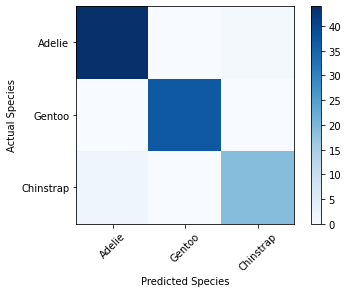

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

혼동 행렬의 어두운 정사각형은 사례 수가 많다는 것을 나타내며, 예측 레이블과 실제 레이블이 동일한 경우를 보고자 하면 정사각형의 대각선 어두움 정도를 보면 됩니다.

다중 클래스 분류 모델의 경우 참 양성 비율과 위양성 비율을 보여주는 단일 ROC 곡선은 불가능합니다. 그러나 OVR (One vs Rest) 비교에서 각 클래스의 One vs Rest을 사용하여 각 클래스에 대한 ROC 차트를 만들 수 있습니다.

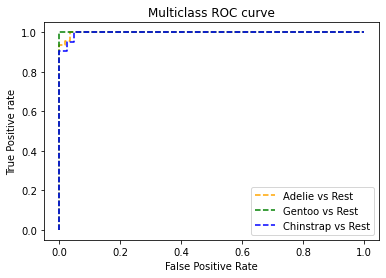

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

ROC 성능을 정량화하기 위해 모든 OVR 곡선에서 평균화 된 곡선 점수 아래의 집계 영역을 계산할 수 있습니다.

In [34]:
auc = roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


### 파이프라인의 데이터 전처리

이진 분류와 마찬가지로 파이프라인을 사용하여 데이터를 모델 학습 전에 데이터에 전처리 단계를 적용할 수 있습니다. 훈련 전에 변환 단계에서 수치형 특성을 스케일링하여 펭귄 예측를 개선 할 수 있는지 살펴 보겠습니다. 이번에는 다른 알고리즘 (서포트 벡터 머신)을 시도하겠습니다.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


이제 새로운 모델을 평가할 수 있습니다.

Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


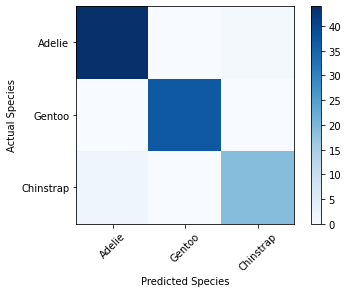

In [36]:
# Get predictions from test data
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### 학습한 모델에 새 데이터 관측치를 이용

이제 훈련 된 모델을 저장하여 나중에 다시 사용할 수 있도록 하겠습니다.

In [37]:
import joblib

# Save the model as a pickle file
filename = './models/penguin_model.pkl'
joblib.dump(multi_model, filename)

['./models/penguin_model.pkl']

이제 훈련 된 모델이 생겼습니다. 새로운 펭귄 관측 데이터 클래스를 예측하는데 사용하겠습니다.

In [38]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[50.4,15.3,224,5550]])
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])

New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


또한 펭귄 관측치 배치 만큼을 모델에 제출하고 예측을 받아올 수 있습니다.

In [39]:
# This time our input is an array of two feature arrays
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)


## 더 읽을 거리

분류는 기계 학습의 가장 일반적인 형태 중 하나이며,이 노트북에서 논의한 기본 원칙을 따르면 scikit-learn으로 분류 모델을 학습하고 평가할 수 있습니다. 분류 알고리즘을 좀 더 깊이 조사하는데 시간을 할애 할 가치가 있으며, 좋은 출발점은 [Scikit-Learn 설명서](https://scikit-learn.org/stable/user_guide.html) 입니다.

## 과제 : 와인 분류

분류 모델을 교육하고 싶으십니까? [/challenge/03 - Wine Classification Challenge.ipynb](/Challenge/03%20-%20Wine%20Classification%20Challenge.ipynb) 노트북에서 도전을 시도하여 와인을 포도 품종으로 분류할 수 있는지 확인해 보십시오!

> **참고**: 이 선택적 과제를 완료하는 시간은 이 연습의 예상 시간에 포함되지 않습니다. 원하는 만큼 시간을 적게 또는 많이 할애할 수 있습니다!